In [52]:
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as st 
import numpy as np 


healthcare_diabetes_path =  r"C:\Users\astri\class_work\Project_1_Group6\Healthcare-Diabetes.csv"


healthcare_diabetes = pd.read_csv(healthcare_diabetes_path) 



In [79]:
#This our cleaned/scrubbed data 

diabetes_df = pd.DataFrame(healthcare_diabetes)



def remove_rows_with_zeros(df, columns):
    """
    Remove rows from DataFrame that contain zero values across certain columns.

    
    """
   
    zero_mask = (df[columns] == 0).any(axis=1)

    
    filtered_df = df[~zero_mask]

    return filtered_df


columns_to_check = ['SkinThickness', 'Insulin', 'Glucose', 'BMI', 'BloodPressure']
filtered_diabetes_df = remove_rows_with_zeros(diabetes_df, columns_to_check)


print("Original DataFrame Shape:", diabetes_df.shape)
print("Filtered DataFrame Shape:", filtered_diabetes_df.shape)

filtered_diabetes_df



Original DataFrame Shape: (2768, 10)
Filtered DataFrame Shape: (1427, 10)


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
6,7,3,78,50,32,88,31.0,0.248,26,1
8,9,2,197,70,45,543,30.5,0.158,53,1
13,14,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...,...
2762,2763,1,79,60,42,48,43.5,0.678,23,0
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2766,2767,0,129,110,46,130,67.1,0.319,26,1


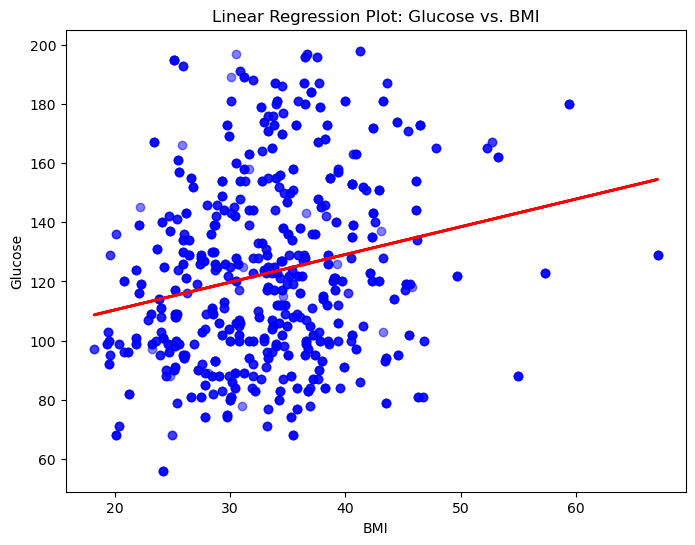

In [80]:




def plot_linear_regression(df, x_column, y_column):
    """
    Plot a linear regression line on a scatter plot of two columns from a DataFrame using matplotlib.

    """
    # Extract x and y data
    x = df[x_column]
    y = df[y_column]

    #slope (m) and y-intercept (b) of the linear regression line
    mean_x = x.mean()
    mean_y = y.mean()
    numerator = sum((x - mean_x) * (y - mean_y))
    denominator = sum((x - mean_x)**2)
    m = numerator / denominator
    b = mean_y - m * mean_x

    # scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)

    # Plot linear regression line
    plt.plot(x, m * x + b, color='red', linewidth=2)

    # labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Linear Regression Plot: {y_column} vs. {x_column}')

    # Show plot
    plt.show()


plot_linear_regression(filtered_diabetes_df, 'BMI', 'Glucose')


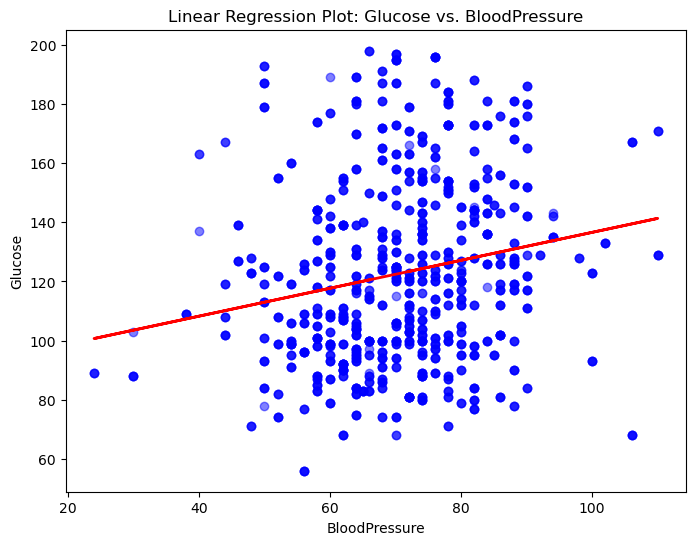

In [81]:
def plot_linear_regression(df, x_column, y_column):
    """
    linear regression line on a scatter plot of two columns 

    
    """
    # Extract x and y data
    x = df[x_column]
    y = df[y_column]

    # slope (m) and y-intercept (b) of the linear regression line
    mean_x = x.mean()
    mean_y = y.mean()
    numerator = sum((x - mean_x) * (y - mean_y))
    denominator = sum((x - mean_x)**2)
    m = numerator / denominator
    b = mean_y - m * mean_x

    # scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)

    # linear regression line
    plt.plot(x, m * x + b, color='red', linewidth=2)

    # labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Linear Regression Plot: {y_column} vs. {x_column}')

    # Show plot
    plt.show()


plot_linear_regression(filtered_diabetes_df, 'BloodPressure', 'Glucose')

In [82]:
#3)	What is the average age of Diabetic individuals


diabetes_average = healthcare_diabetes.groupby("Outcome")["Age"].mean()

#  Filter DataFrame by Outcome == 1
outcome_1_df = filtered_diabetes_df[filtered_diabetes_df['Outcome'] == 1]

# Calculate value counts for ages in the filtered DataFrame
age_counts = outcome_1_df['Age'].value_counts()

# Find the most common age (mode) associated with Outcome == 1
most_common_age = age_counts.idxmax()

print("The most common age for Outcome = 1 in diabetes is:", most_common_age)





The most common age for Outcome = 1 in diabetes is: 25


C:\Users\astri\AppData\Local\Temp\ipykernel_6460\3280936558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome_1_df['Age_Group'] = pd.cut(outcome_1_df['Age'], bins=age_bins, right=False)


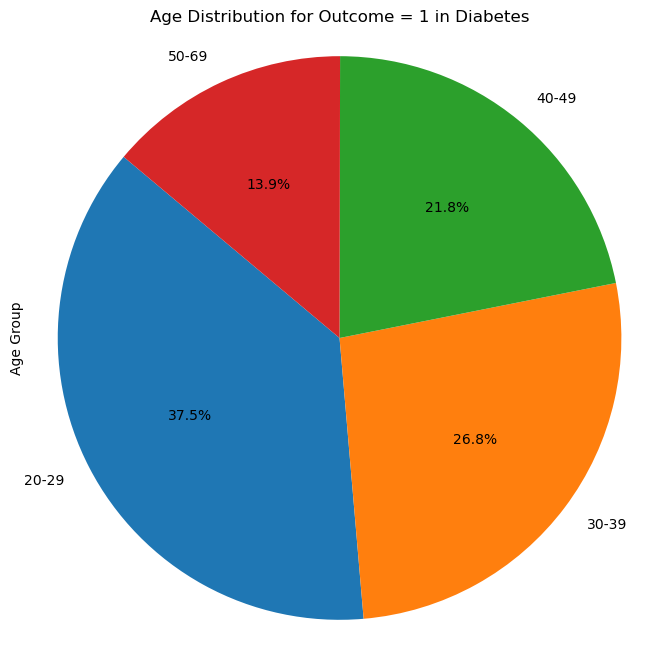

In [83]:


#  age bins
age_bins = [20, 30, 40, 50, 70]  # Define age bin boundaries

# Filter the DataFrame by Outcome == 1
outcome_1_df = filtered_diabetes_df[filtered_diabetes_df['Outcome'] == 1]

# categorize ages into bins
outcome_1_df['Age_Group'] = pd.cut(outcome_1_df['Age'], bins=age_bins, right=False)

# Count values in each age group
age_group_counts = outcome_1_df['Age_Group'].value_counts().sort_index()

# plot
plt.figure(figsize=(8, 8))  # Set the figure size

# Plotting the pie chart
labels = [f'{age.left}-{age.right-1}' for age in age_group_counts.index]
plt.pie(age_group_counts, labels=labels, autopct='%1.1f%%', startangle=140)

#  title and labels
plt.title('Age Distribution for Outcome = 1 in Diabetes')
plt.ylabel('Age Group')

# Show plot
plt.axis('equal')  
plt.show()


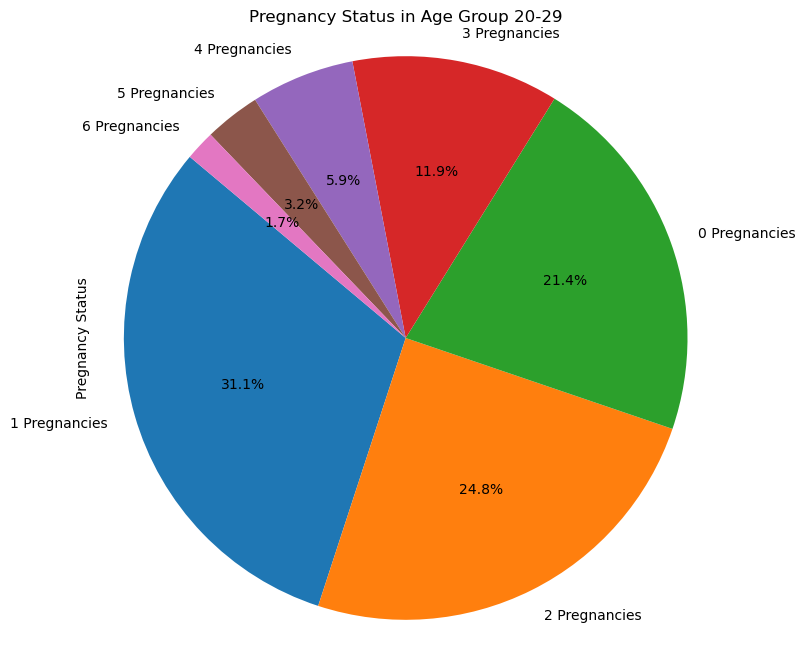

In [75]:


# age range (20-29)
age_min = 20
age_max = 29

#  Filter DataFrame by Age within range
age_group_df = filtered_diabetes_df[(filtered_diabetes_df['Age'] >= age_min) & (filtered_diabetes_df['Age'] <= age_max)]

# Calculate value counts for pregnancy status ('Pregnancies') in filtered DataFrame
pregnancy_counts = age_group_df['Pregnancies'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))  

# Plotting the pie chart
labels = [f'{num} Pregnancies' for num in pregnancy_counts.index]
plt.pie(pregnancy_counts, labels=labels, autopct='%1.1f%%', startangle=140)

# title and labels
plt.title(f'Pregnancy Status in Age Group {age_min}-{age_max}')
plt.ylabel('Pregnancy Status')

# Show plot
plt.axis('equal')  
plt.show()


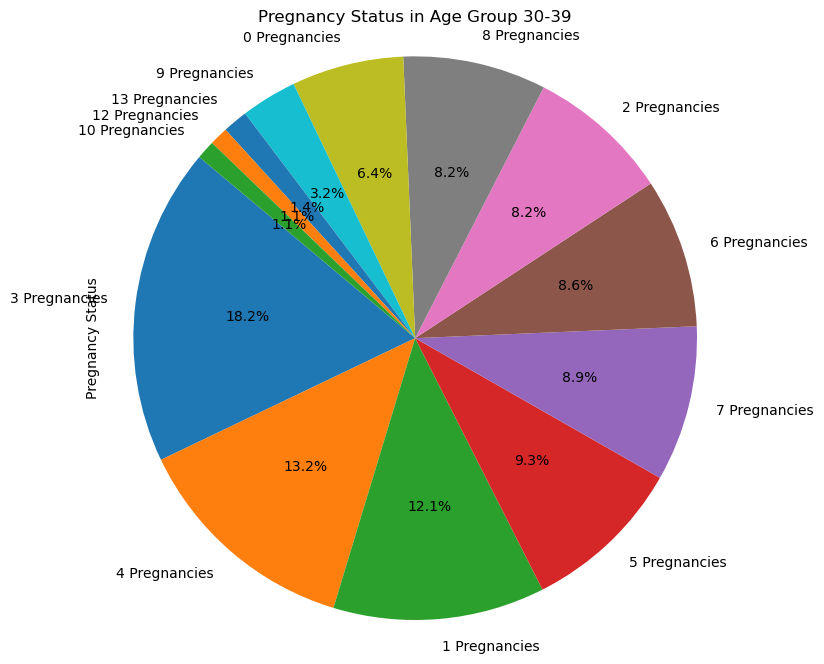

In [84]:


# age range (30-39)
age_min = 30
age_max = 39

# Filter the DataFrame by Age within range
age_group_df = filtered_diabetes_df[(filtered_diabetes_df['Age'] >= age_min) & (filtered_diabetes_df['Age'] <= age_max)]

# Calculate value counts for pregnancy status ('Pregnancies') in filtered DataFrame
pregnancy_counts = age_group_df['Pregnancies'].value_counts()

#  Plot the pie chart
plt.figure(figsize=(8, 8))  

# Plotting the pie chart
labels = [f'{num} Pregnancies' for num in pregnancy_counts.index]
plt.pie(pregnancy_counts, labels=labels, autopct='%1.1f%%', startangle=140)

# title and labels
plt.title(f'Pregnancy Status in Age Group {age_min}-{age_max}')
plt.ylabel('Pregnancy Status')

# Show plot
plt.axis('equal')  
plt.show()


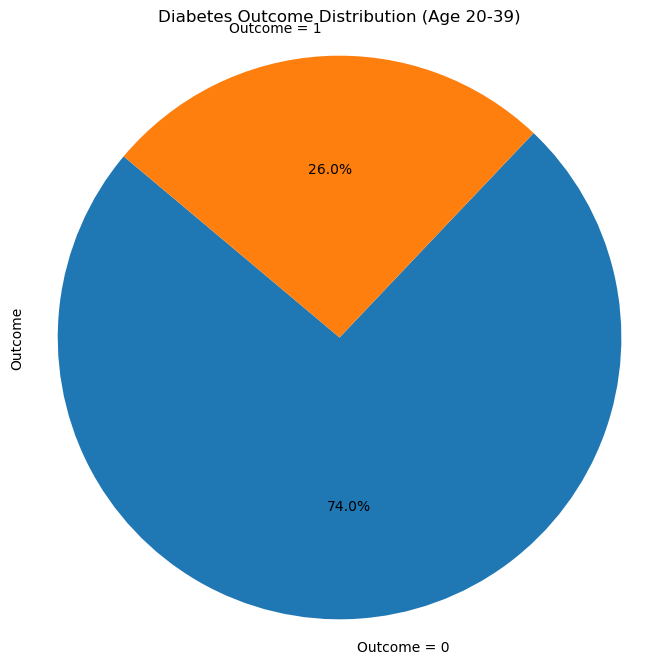

In [78]:


# age range (20-39)
age_min = 20
age_max = 39

# Filter DataFrame by Age within the range
filtered_df = filtered_diabetes_df[(filtered_diabetes_df['Age'] >= age_min) & (filtered_diabetes_df['Age'] <= age_max)]

# Calculate the counts of outcomes (0 and 1) within filtered DataFrame
outcome_counts = filtered_df['Outcome'].value_counts()

#  Calculate percentages for each outcome category
total_count = outcome_counts.sum()
percentage_0 = (outcome_counts[0] / total_count) * 100
percentage_1 = (outcome_counts[1] / total_count) * 100

# pie chart
plt.figure(figsize=(8, 8))  

# pie chart
labels = ['Outcome = 0', 'Outcome = 1']
percentages = [percentage_0, percentage_1]
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)

# title and labels
plt.title(f'Diabetes Outcome Distribution (Age {age_min}-{age_max})')
plt.ylabel('Outcome')

# show
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle



<Figure size 1000x600 with 0 Axes>

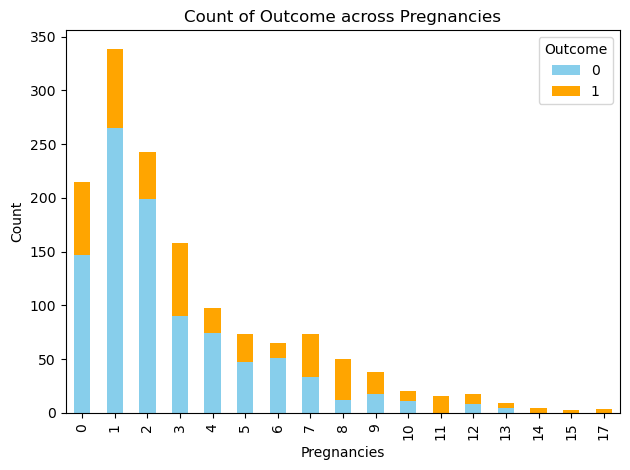

In [85]:
#4)	Is there a correlation between the number of pregnancies and Diabetes- greater than or equal to 36 
#Scatter plot with regression line 


def plot_bar_graph_binary(df, x_column, y_column):
    """
    

    
    """
    
    counts = df.groupby([x_column, y_column]).size().unstack(fill_value=0)

   
    plt.figure(figsize=(10, 6))  

    
    counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

   
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.title(f'Count of {y_column} across {x_column}')

   

    
    plt.tight_layout()  
    plt.legend(title=y_column)  
    plt.show()


plot_bar_graph_binary(filtered_diabetes_df, 'Pregnancies', 'Outcome')







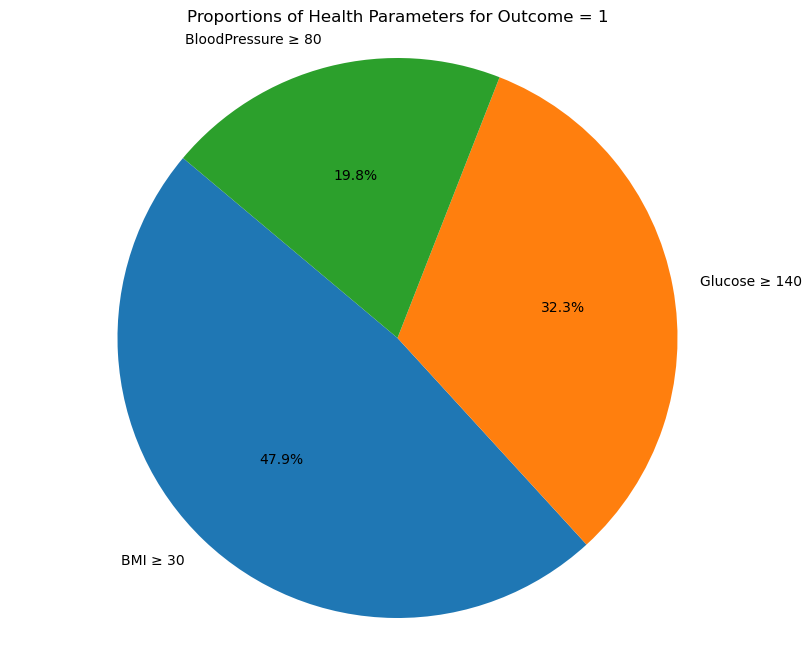

In [65]:
#What is the strongest factor for DM? 

filtered_bmi_df = filtered_diabetes_df[(filtered_diabetes_df['BMI']>=30) & (filtered_diabetes_df['Outcome'] ==1)]

filtered_glucose_df = filtered_diabetes_df[(filtered_diabetes_df['Glucose']>=140) & (filtered_diabetes_df['Outcome'] ==1)]

filtered_blood_pressure_df = filtered_diabetes_df[(filtered_diabetes_df['BloodPressure']>=80) & (filtered_diabetes_df['Outcome'] ==1)]


bmi_proportions = len(filtered_bmi_df) / len(filtered_diabetes_df)
glucose_proportions = len(filtered_glucose_df) / len(filtered_diabetes_df)
blood_pressure_proportions = len(filtered_blood_pressure_df) / len(filtered_diabetes_df)

# Plotting pie chart
plt.figure(figsize=(10, 8))  

# labels & proportions 
labels = ['BMI ≥ 30', 'Glucose ≥ 140', 'BloodPressure ≥ 80']
proportions = [bmi_proportions, glucose_proportions, blood_pressure_proportions]

#  labels and percentages
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Proportions of Health Parameters for Outcome = 1')

# Show plot
plt.axis('equal')  
plt.show()








   








